In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
import webbrowser
import os
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
apps_df = pd.read_csv("Play Store Data.csv")
reviews_df = pd.read_csv("User Reviews.csv")

In [3]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
merged_df=pd.merge(apps_df,reviews_df,on='App',how='inner')

In [6]:
merged_df.dropna(inplace=True)

In [7]:
five_star_reviews= merged_df[merged_df['Rating'] >=4.9]

In [8]:
five_star_reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
548,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,03-Jul-18,1.7,4.2 and up,The good reviewing material cdl. I got permit ...,Positive,0.350000,0.350000
549,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,03-Jul-18,1.7,4.2 and up,I swear faith God go sections need pass doubt....,Positive,0.050000,0.500000
551,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,03-Jul-18,1.7,4.2 and up,I never thought I would find helpful like guys...,Positive,0.520000,0.500000
553,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,03-Jul-18,1.7,4.2 and up,"I already CDL, I'm wanting add endorsements, I...",Positive,0.253571,0.557143
554,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,03-Jul-18,1.7,4.2 and up,Love cause gives opportunity review wrong... 1...,Positive,0.175000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28476,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,17-May-18,2.6.1,4.2 and up,This best yoga I came across. It good videos c...,Positive,0.343308,0.378157
28477,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,17-May-18,2.6.1,4.2 and up,This beautiful yoga - beautiful yoga community...,Positive,0.402820,0.773906
28478,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,17-May-18,2.6.1,4.2 and up,I'm new yoga I needed could help get started. ...,Positive,0.304545,0.471818
28479,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,17-May-18,2.6.1,4.2 and up,It nice first days began demanding I upgrade I...,Positive,0.083333,0.528205


In [9]:
Health_Fitness_df = five_star_reviews[five_star_reviews['Category'] == 'HEALTH_AND_FITNESS']

In [10]:
Health_Fitness_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
28441,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,17-May-18,2.6.1,4.2 and up,One best I could find yoga home. I yoga expert...,Positive,0.460000,0.440000
28442,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,17-May-18,2.6.1,4.2 and up,"I've never done yoga, nervous start. Being abl...",Positive,0.194381,0.591644
28443,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,17-May-18,2.6.1,4.2 and up,This fantastic! I love I customize style durat...,Positive,0.218795,0.438997
28444,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,17-May-18,2.6.1,4.2 and up,This surprisingly good! I travel lot I've neve...,Positive,0.326944,0.578889
28445,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,17-May-18,2.6.1,4.2 and up,"This really calm, relaxing feel choice 5 style...",Positive,0.081429,0.607143


In [11]:
all_words = " ".join(five_star_reviews['Translated_Review'])

In [12]:
app_name = " ".join(five_star_reviews['App'])

In [13]:
app_name

'CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition CDL Practice Test 2018 Edition DMV Permit Practice Test 2018 Edition DMV Permit Practice Test 2018 Edition DMV Permit Practice Test 2018 Edition DMV Permit Practice Test 2018 Edition DMV Permit Practice Test 2018 Edition DMV Permit Practice Test 2018 Edition DMV Permit Practice Test 20

In [14]:
all_words

'The good reviewing material cdl. I got permit 3 days ago passed 1st attempt. However answers questions incorrect, I\'ve notified fixed answers yet. So aware reviewing. I swear faith God go sections need pass doubt. I missed 3 general knowledge 1 airbrakes I go sections within 3days tested today passed want cdls get I never thought I would find helpful like guys greatest keep good work thanks everything us. We trying better selves . thanks I already CDL, I\'m wanting add endorsements, I thought I\'d give try. I really like I\'ve taken 3 levels GK far. I\'m really seeing lot questions SC CDL test though. Crist CDL good tool 100% real test questions, sadly isnt app. Good luck everyone! Love cause gives opportunity review wrong... 100% recommend anyone wants get CDL license free! Love I get question wrong actually brings question back around asks put memory faster. Also helps keep grade little lol. Thanks million times! I feeling really nervous taking CDL test makes feel much better it. I

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
stop_words = stop_words.union(app_name)

In [17]:
cleaned_string = " ".join(word for word in all_words.split() if word.lower() not in stop_words)

In [18]:
apps_df['Rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64>

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

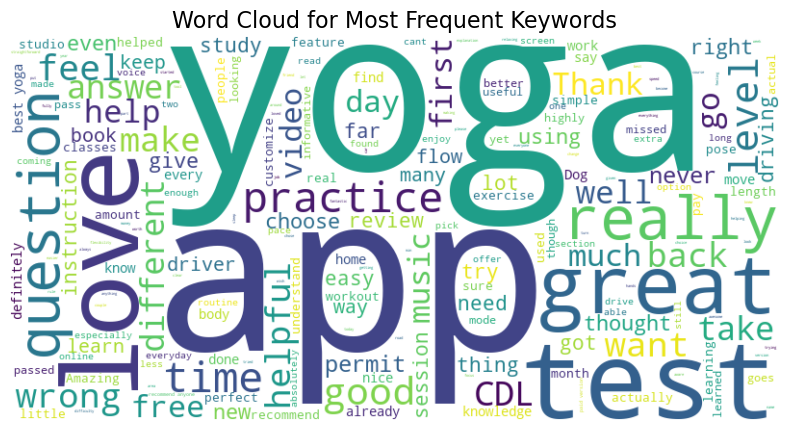

In [46]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_string)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Most Frequent Keywords", fontsize=16)
plt.show()